In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../readmaroc')

from maroc_data_new_tboard import MarocData

from functools import partial
from collections import Counter
from scipy.stats import norm

input_dat = '../data/Run000137492.dat'
marocdata = MarocData(input_dat)

y_offset = [12000, 10000, 8000, 4000, 2000]

In [2]:
marocdata.get_board(1).clean_timestamps

{0: 14,
 982926: 15,
 8818334: 16,
 23092090: 17,
 23371912: 18,
 27947077: 19,
 28930110: 20,
 33859634: 21,
 44865891: 22,
 49339175: 23,
 49738114: 24,
 53920752: 25,
 59204945: 26,
 86916971: 27,
 87664874: 28,
 95354022: 29,
 98759606: 30,
 100397059: 31,
 107761620: 32,
 115023959: 33,
 118706322: 34,
 131434536: 35,
 138842882: 36,
 140204556: 37,
 144323867: 38,
 147424441: 39,
 152049685: 40,
 158306827: 41,
 160749965: 42,
 163954314: 43,
 170404126: 44,
 183830621: 45,
 198861947: 46,
 206950484: 47,
 214857037: 48,
 219416609: 49,
 223667546: 50,
 228054781: 51,
 237339102: 52,
 248549506: 53,
 251389205: 54,
 261299388: 55,
 269386890: 56,
 270829427: 57,
 284956816: 58,
 307859773: 59,
 358959330: 60,
 361618037: 61,
 362690066: 62,
 370431780: 63,
 382571718: 64,
 395047544: 65,
 397973860: 66,
 411248231: 67,
 423620372: 68,
 423916037: 69,
 424135610: 70,
 439599879: 71,
 440957948: 72,
 447696700: 73,
 448869231: 74,
 456052868: 75,
 481839178: 76,
 482370782: 77,
 48

In [3]:
marocdata.check_clean_ts()

Timestamps of board 1 have been fixed


In [4]:
marocdata.get_board(1).clean_timestamps

{7835408: 14,
 8818334: 15,
 16653742: 16,
 30927498: 17,
 31207320: 18,
 35782485: 19,
 36765518: 20,
 41695042: 21,
 52701299: 22,
 57174583: 23,
 57573522: 24,
 61756160: 25,
 67040353: 26,
 94752379: 27,
 95500282: 28,
 103189430: 29,
 106595014: 30,
 108232467: 31,
 115597028: 32,
 122859367: 33,
 126541730: 34,
 139269944: 35,
 146678290: 36,
 148039964: 37,
 152159275: 38,
 155259849: 39,
 159885093: 40,
 166142235: 41,
 168585373: 42,
 171789722: 43,
 178239534: 44,
 191666029: 45,
 206697355: 46,
 214785892: 47,
 222692445: 48,
 227252017: 49,
 231502954: 50,
 235890189: 51,
 245174510: 52,
 256384914: 53,
 259224613: 54,
 269134796: 55,
 277222298: 56,
 278664835: 57,
 292792224: 58,
 315695181: 59,
 366794738: 60,
 369453445: 61,
 370525474: 62,
 378267188: 63,
 390407126: 64,
 402882952: 65,
 405809268: 66,
 419083639: 67,
 431455780: 68,
 431751445: 69,
 431971018: 70,
 447435287: 71,
 448793356: 72,
 455532108: 73,
 456704639: 74,
 463888276: 75,
 489674586: 76,
 49020619

In [5]:
marocdata.get_board(2).clean_timestamps

{0: 14,
 7835408: 15,
 22109164: 16,
 22388986: 17,
 26964151: 18,
 27947184: 19,
 32876708: 20,
 43882965: 21,
 48356249: 22,
 48755188: 23,
 52937826: 24,
 58222019: 25,
 85934045: 26,
 86681948: 27,
 94371096: 28,
 97776680: 29,
 99414133: 30,
 106778694: 31,
 114041033: 32,
 117723396: 33,
 130451610: 34,
 137859956: 35,
 139221630: 36,
 143340941: 37,
 146441515: 38,
 151066759: 39,
 157323901: 40,
 159767039: 41,
 162971388: 42,
 169421200: 43,
 182847695: 44,
 197879021: 45,
 205967558: 46,
 213874111: 47,
 218433683: 48,
 222684620: 49,
 227071855: 50,
 236356176: 51,
 247566580: 52,
 250406279: 53,
 260316462: 54,
 268403964: 55,
 269846501: 56,
 283973890: 57,
 306876847: 58,
 357976404: 59,
 360635111: 60,
 361707140: 61,
 369448854: 62,
 381588792: 63,
 394064618: 64,
 396990934: 65,
 410265305: 66,
 422637446: 67,
 422933111: 68,
 423152684: 69,
 438616953: 70,
 439975022: 71,
 446713774: 72,
 447886305: 73,
 455069942: 74,
 480856252: 75,
 481387856: 76,
 481661226: 77,
 

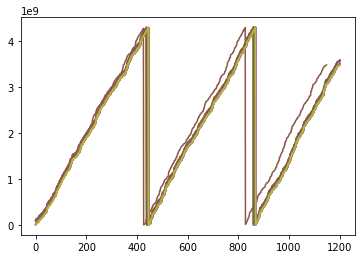

In [6]:
for board in marocdata.active_boards:
    ts = [event.TS for i, event in marocdata.get_board(board).events.items()]
    plt.plot(np.arange(len(ts)), ts)

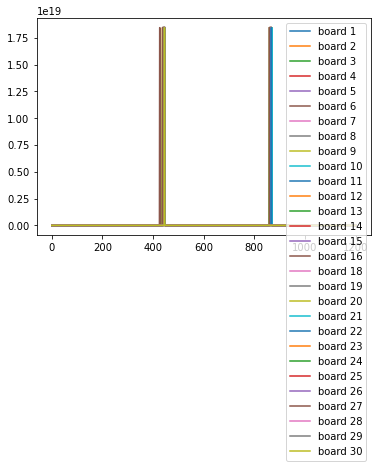

In [7]:
for board in marocdata.active_boards:
    ts = [t for t in marocdata.get_board(board).clean_timestamps]
    plt.plot(np.arange(len(ts)), ts, label='board {}'.format(board))
plt.legend()
plt.show()

### take original TS

In [8]:
ts_8 = np.asarray([event.TS for i, event in marocdata.get_board(8).events.items()])
ts_9 = np.asarray([event.TS for i, event in marocdata.get_board(9).events.items()])

In [9]:
MAX_UINT32 = np.iinfo(np.uint32).max

#### calculate overflow coordinates

In [10]:
def overflow_idx(ts):
        indices = []
        for i, (t, tp1) in enumerate(zip(ts, ts[1:])):
            if tp1 < t:
                indices.append(i + 1)
        indices.append(len(ts))
        return indices


In [11]:
overflow_idx(ts_8)

[438, 859, 1201]

In [12]:
overflow_idx(ts_9)

[438, 860, 1201]

#### plot original TS

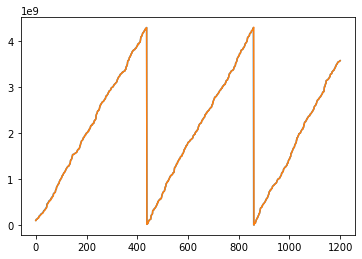

In [13]:
plt.plot(np.arange(len(ts_8)), ts_8)
plt.plot(np.arange(len(ts_9)), ts_9)
plt.show()

#### plot difference between original TS

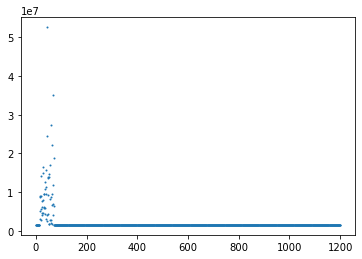

In [14]:
plt.scatter(np.arange(1201), ts_8-ts_9, s=1)
plt.show()

#### convert to int64 and add $2^{32} \times n$

In [15]:
ts_64_8 = np.asarray(ts_8, dtype=np.uint64)
ts_0 = ts_64_8[0]
ts_64_8[:overflow_idx(ts_8)[0]] -= ts_0
for i, (start, stop) in enumerate(zip(overflow_idx(ts_8),overflow_idx(ts_8)[1:])):
    print(start)
    
    ts_restart = ts_64_8[start]

    
    ts_64_8[start:stop] += MAX_UINT32*(i+1)
    #ts_64_8[start:stop] -= ts_restart

438
859


In [16]:
ts_64_9 = np.asarray(ts_9, dtype=np.uint64)
ts_0 = ts_64_9[0]
ts_64_9[:overflow_idx(ts_9)[0]] -= ts_0
for i, (start, stop) in enumerate(zip(overflow_idx(ts_9),overflow_idx(ts_9)[1:])):
    print(i, start)
    
    ts_restart = ts_64_9[start]
    print(start, stop)
    
    ts_64_9[start:stop] += MAX_UINT32*(i+1)
    #ts_64_9[start:stop] -= ts_restart

0 438
438 860
1 860
860 1201


#### plot TS and difference

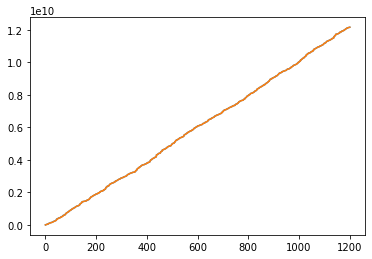

In [17]:
plt.plot(np.arange(len(ts_8)), ts_64_8)
plt.plot(np.arange(len(ts_9)), ts_64_9)

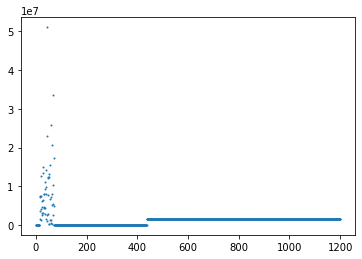

In [18]:
plt.scatter(np.arange(1201), ts_64_8-ts_64_9, s=1)
plt.show()

#### convert to int64 and subtract restart TS without adding $2^32 \times n$

In [19]:
ts_64_8 = np.asarray(ts_8, dtype=np.uint64)
ts_0 = ts_64_8[0]
ts_64_8[:overflow_idx(ts_8)[0]] -= ts_0
for i, (start, stop) in enumerate(zip(overflow_idx(ts_8),overflow_idx(ts_8)[1:])):
    print(start)
    
    ts_restart = ts_64_8[start]

    
    #ts_64_8[start:stop] += MAX_UINT32*(i+1)
    ts_64_8[start:stop] -= ts_restart

438
859


In [20]:
ts_64_9 = np.asarray(ts_9, dtype=np.uint64)
ts_0 = ts_64_9[0]
ts_64_9[:overflow_idx(ts_9)[0]] -= ts_0
for i, (start, stop) in enumerate(zip(overflow_idx(ts_9),overflow_idx(ts_9)[1:])):
    print(i, start)
    
    ts_restart = ts_64_9[start]
    print(start, stop)
    
    #ts_64_9[start:stop] += MAX_UINT32*(i+1)
    ts_64_9[start:stop] -= ts_restart

0 438
438 860
1 860
860 1201


#### plot TS and difference

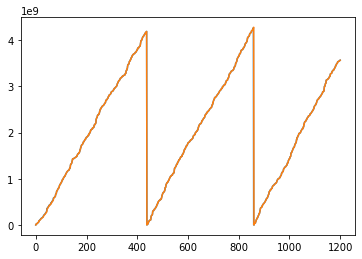

In [21]:
plt.plot(np.arange(len(ts_8)), ts_64_8)
plt.plot(np.arange(len(ts_9)), ts_64_9)

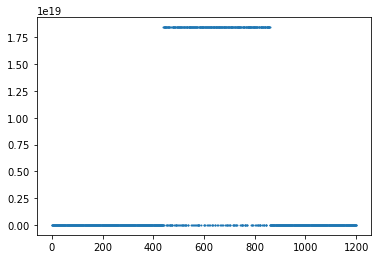

In [22]:
plt.scatter(np.arange(1201), ts_64_8-ts_64_9, s=1)
plt.show()

#### do both: add $2^32 \times n$ and subtract restart

In [23]:
ts_64_8 = np.asarray(ts_8, dtype=np.uint64)
ts_0 = ts_64_8[0]
ts_64_8[:overflow_idx(ts_8)[0]] -= ts_0
for i, (start, stop) in enumerate(zip(overflow_idx(ts_8),overflow_idx(ts_8)[1:])):
    print(start)
    
    ts_restart = ts_64_8[start]

    
    ts_64_8[start:stop] += MAX_UINT32*(i+1)
    ts_64_8[start:stop] -= ts_restart

438
859


In [24]:
ts_64_9 = np.asarray(ts_9, dtype=np.uint64)
ts_0 = ts_64_9[0]
ts_64_9[:overflow_idx(ts_9)[0]] -= ts_0
for i, (start, stop) in enumerate(zip(overflow_idx(ts_9),overflow_idx(ts_9)[1:])):
    print(i, start)
    
    ts_restart = ts_64_9[start]
    print(start, stop)
    
    ts_64_9[start:stop] += MAX_UINT32*(i+1)
    ts_64_9[start:stop] -= ts_restart

0 438
438 860
1 860
860 1201


#### plot TS and difference

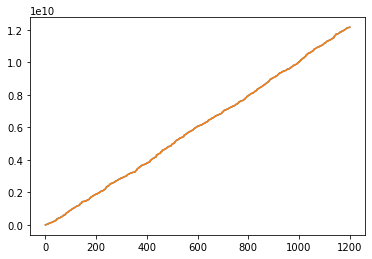

In [25]:
plt.plot(np.arange(len(ts_8)), ts_64_8)
plt.plot(np.arange(len(ts_9)), ts_64_9)

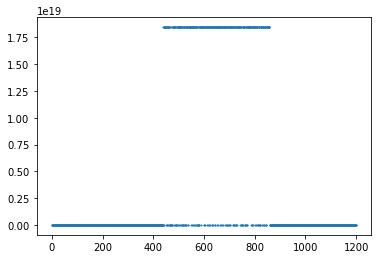

In [26]:
plt.scatter(np.arange(1201), ts_64_8-ts_64_9, s=1)

plt.show()

#### plot clean timestamps

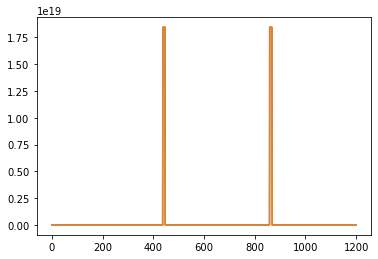

In [27]:
for b in[8,9]:
    ts = marocdata.get_board(b).clean_timestamps.keys()
    plt.plot(np.arange(len(ts)), ts)
plt.show()

In [28]:
marocdata.fix_p1(debug=False)

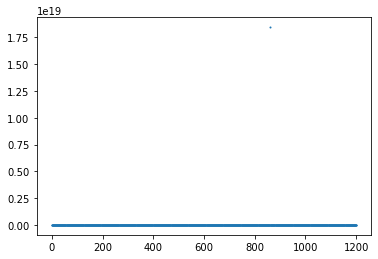

In [29]:
ts_clean_8 = np.asarray(list(marocdata.get_board(8).clean_timestamps.keys()), dtype=np.uint64)
ts_clean_9 = np.asarray(list(marocdata.get_board(9).clean_timestamps.keys()), dtype=np.uint64)

plt.scatter(np.arange(len(ts_clean_8)), ts_clean_8-ts_clean_9, s=1)
plt.show()

In [30]:
ts_clean_8[10:20]

array([ 52937825,  58222018,  85934045,  86681948,  94371096,  99414133,
       106778694, 114041033, 117723396, 130451609], dtype=uint64)

In [31]:
ts_clean_9[10:20]

array([ 52937825,  58222018,  85934045,  86681948,  94371096,  97776680,
        99414133, 106778694, 114041033, 117723396], dtype=uint64)

In [32]:
for (i, t8) in enumerate(ts_clean_8):
    for  (j, t9) in enumerate(ts_clean_9):
        if t8-t9==0:
            print(i, t8, j, t9)
    

0 0 0 0
1 7835407 1 7835407
2 22109164 2 22109164
3 22388986 3 22388986
4 26964151 4 26964151
5 27947184 5 27947184
6 32876707 6 32876707
7 43882964 7 43882964
8 48356249 8 48356249
9 48755187 9 48755187
10 52937825 10 52937825
11 58222018 11 58222018
12 85934045 12 85934045
13 86681948 13 86681948
14 94371096 14 94371096
15 99414133 16 99414133
16 106778694 17 106778694
17 114041033 18 114041033
18 117723396 19 117723396
19 130451609 20 130451609
20 137859955 21 137859955
21 139221630 22 139221630
22 143340941 23 143340941
23 146441515 24 146441515
24 151066759 25 151066759
25 157323901 26 157323901
26 159767039 27 159767039
27 162971387 28 162971387
28 169421200 29 169421200
29 182847695 30 182847695
30 197879021 31 197879021
31 205967557 32 205967557
32 213874110 33 213874110
33 218433683 34 218433683
34 222684620 35 222684620
35 227071854 36 227071854
36 236356175 37 236356175
37 247566580 38 247566580
38 250406279 39 250406279
39 260316462 40 260316462
40 268403964 41 268403964
41

<ipython-input-32-56a91e713de0>:3: RuntimeWarning: overflow encountered in ulong_scalars
  if t8-t9==0:


 510470918 65 510470918
65 515598213 66 515598213
66 518201600 67 518201600
67 528647259 68 528647259
68 534109982 69 534109982
69 567679152 70 567679152
70 584848772 71 584848772
72 589833027 72 589833027
73 592668031 73 592668031
74 601429672 74 601429672
75 607504720 75 607504720
76 612554681 76 612554681
77 615500101 77 615500101
78 653775460 78 653775460
79 668336148 79 668336148
80 677483421 80 677483421
81 684232007 81 684232007
82 722869010 82 722869010
83 735275922 83 735275922
84 737737739 84 737737739
85 750934632 85 750934632
86 765472619 86 765472619
87 774482195 87 774482195
88 784256532 88 784256532
89 792290340 89 792290340
90 801309093 90 801309093
91 801780658 91 801780658
92 815585281 92 815585281
93 845087403 93 845087403
94 855361330 94 855361330
95 875968278 95 875968278
96 878048490 96 878048490
97 879696434 97 879696434
98 896889870 98 896889870
99 909502879 99 909502879
100 915516662 100 915516662
101 918132154 101 918132154
102 938513522 102 938513522
103 9443

393 3739355908 393 3739355908
394 3741832830 394 3741832830
395 3742842810 395 3742842810
396 3748911611 396 3748911611
397 3763310914 397 3763310914
398 3779052378 398 3779052378
399 3783741722 399 3783741722
400 3785551984 400 3785551984
401 3812792823 401 3812792823
402 3813088449 402 3813088449
403 3835249893 403 3835249893
404 3835445513 404 3835445513
405 3835504027 405 3835504027
406 3836331728 406 3836331728
407 3848167628 407 3848167628
408 3861342371 408 3861342371
409 3865154111 409 3865154111
410 3866883798 410 3866883798
411 3870809411 411 3870809411
412 3891895332 412 3891895332
413 3931666542 413 3931666542
414 3971955876 414 3971955876
415 3989131009 415 3989131009
416 3995476202 416 3995476202
417 3996278898 417 3996278898
418 4014283709 418 4014283709
419 4017779603 419 4017779603
420 4044586948 420 4044586948
421 4061167300 421 4061167300
422 4069697824 422 4069697824
423 4077034332 423 4077034332
424 4079141495 424 4079141495
425 4094147033 425 4094147033
426 409504

679 2371655009 679 2371655009
680 2384662290 680 2384662290
681 2386939140 681 2386939140
682 2392866929 682 2392866929
683 2396211124 683 2396211124
684 2408656138 684 2408656138
685 2417951394 685 2417951394
686 2430799370 686 2430799370
687 2434233381 687 2434233381
688 2437793549 688 2437793549
689 2441866258 689 2441866258
690 2450449990 690 2450449990
691 2461173790 691 2461173790
692 2464244850 692 2464244850
693 2464389907 693 2464389907
694 2493156543 694 2493156543
695 2510929373 695 2510929373
696 2521071901 696 2521071901
697 2521686214 697 2521686214
698 2562862149 698 2562862149
699 2563291401 699 2563291401
700 2594719237 700 2594719237
701 2610191222 701 2610191222
702 2625940761 702 2625940761
703 2636413806 703 2636413806
704 2643113964 704 2643113964
705 2671185770 705 2671185770
706 2671802065 706 2671802065
707 2681905582 707 2681905582
708 2682034885 708 2682034885
709 2685795425 709 2685795425
710 2689655611 710 2689655611
711 2690930608 711 2690930608
712 269838

1006 1456552531 1006 1456552531
1007 1464485192 1007 1464485192
1008 1465824702 1008 1465824702
1009 1471282019 1009 1471282019
1010 1497046692 1010 1497046692
1011 1501928594 1011 1501928594
1012 1517743476 1012 1517743476
1013 1532714028 1013 1532714028
1014 1554362470 1014 1554362470
1015 1562423810 1015 1562423810
1016 1571895543 1016 1571895543
1017 1575553297 1017 1575553297
1018 1584161148 1018 1584161148
1019 1585573460 1019 1585573460
1020 1613191973 1020 1613191973
1021 1632176351 1021 1632176351
1022 1650913892 1022 1650913892
1023 1654612919 1023 1654612919
1024 1670581171 1024 1670581171
1025 1673251877 1025 1673251877
1026 1693859008 1026 1693859008
1027 1700235778 1027 1700235778
1028 1751009444 1028 1751009444
1029 1752459042 1029 1752459042
1030 1795459125 1030 1795459125
1031 1796233931 1031 1796233931
1032 1805627304 1032 1805627304
1033 1811503765 1033 1811503765
1034 1833506489 1034 1833506489
1035 1842382876 1035 1842382876
1036 1851392540 1036 1851392540
1037 188

In [35]:
ts_clean_8[859:]

array([18446744073612317074, 18446744073613998639, 18446744073615026139,
       18446744073649583429, 18446744073650911695, 18446744073653011838,
       18446744073653232223, 18446744073655431914, 18446744073687416473,
       18446744073694486559,              4292297,             21418987,
                   26365692,             44164849,             52003692,
                   54625195,             72867799,             76657294,
                   98829117,            110990862,            120261885,
                  146593207,            150574211,            152898056,
                  182629517,            203632345,            238145217,
                  264783130,            274433576,            278924153,
                  281081954,            282722506,            288440451,
                  309528675,            310271775,            331260566,
                  347105863,            349843311,            353564753,
                  361194585,            372363448, 

In [36]:
ts_clean_9[860:]

array([18446744073613998638, 18446744073615026139, 18446744073649583428,
       18446744073650911694, 18446744073653011838, 18446744073653232223,
       18446744073655431913, 18446744073687416473, 18446744073694486558,
                    4292297,             21418987,             26365692,
                   44164849,             52003692,             54625195,
                   72867799,             76657294,             98829117,
                  110990862,            120261885,            146593207,
                  150574211,            152898056,            182629517,
                  203632345,            238145217,            264783130,
                  274433576,            278924153,            281081954,
                  282722506,            288440451,            309528675,
                  310271775,            331260566,            347105863,
                  349843311,            353564753,            361194585,
                  372363448,            379431655, 

In [37]:
overflow_idx(ts_8)

[438, 859, 1201]

In [38]:
overflow_idx(ts_9)

[438, 860, 1201]

In [39]:
ts_8_uint64 = np.asarray(ts_8, dtype=np.uint64)
ts_9_uint64 = np.asarray(ts_9, dtype=np.uint64)

In [40]:
ts_8_uint64[859:]+ts_8_uint64[858]

array([4286559793, 4288241358, 4289268858, 4323826148, 4325154414,
       4327254557, 4327474942, 4329674633, 4361659192, 4368729278,
       4388086633, 4405213323, 4410160028, 4427959184, 4435798028,
       4438419530, 4456662134, 4460451630, 4482623452, 4494785197,
       4504056221, 4530387543, 4534368547, 4536692392, 4566423852,
       4587426681, 4621939553, 4648577466, 4658227911, 4662718489,
       4664876290, 4666516842, 4672234787, 4693323010, 4694066110,
       4715054901, 4730900199, 4733637647, 4737359089, 4744988921,
       4756157784, 4763225990, 4769936409, 4778737978, 4785743120,
       4788020674, 4806464576, 4809711798, 4817787561, 4841792089,
       4851160501, 4856405990, 4858117484, 4869951697, 4872870099,
       4890602056, 4899766976, 4923177189, 4939105668, 4943787377,
       4964258211, 5001655550, 5009587895, 5011887388, 5034521110,
       5035469667, 5036754252, 5052273454, 5052614592, 5060345168,
       5073676024, 5074470241, 5078381437, 5083500261, 5119125

In [41]:
ts_9_uint64[860:]+ts_9_uint64[859]

array([4296440528, 4297468029, 4332025318, 4333353584, 4335453728,
       4335674113, 4337873803, 4369858363, 4376928448, 4396285803,
       4413412494, 4418359198, 4436158355, 4443997199, 4446618701,
       4464861305, 4468650801, 4490822623, 4502984368, 4512255391,
       4538586714, 4542567718, 4544891563, 4574623023, 4595625852,
       4630138723, 4656776636, 4666427082, 4670917660, 4673075461,
       4674716013, 4680433958, 4701522181, 4702265281, 4723254072,
       4739099369, 4741836817, 4745558259, 4753188091, 4764356955,
       4771425161, 4778135580, 4786937149, 4793942291, 4796219845,
       4814663747, 4817910969, 4825986732, 4849991260, 4859359671,
       4864605161, 4866316655, 4878150868, 4881069270, 4898801227,
       4907966146, 4931376360, 4947304839, 4951986547, 4972457382,
       5009854721, 5017787066, 5020086558, 5042720280, 5043668838,
       5044953423, 5060472625, 5060813763, 5068544339, 5081875195,
       5082669411, 5086580608, 5091699431, 5127324909, 5134142

In [42]:
(ts_8_uint64[859:]+MAX_UINT32*2)-ts_8_uint64[438]

array([ 8575567991,  8577249556,  8578277056,  8612834346,  8614162612,
        8616262755,  8616483140,  8618682831,  8650667390,  8657737476,
        8677094831,  8694221521,  8699168226,  8716967382,  8724806226,
        8727427728,  8745670332,  8749459828,  8771631650,  8783793395,
        8793064419,  8819395741,  8823376745,  8825700590,  8855432050,
        8876434879,  8910947751,  8937585664,  8947236109,  8951726687,
        8953884488,  8955525040,  8961242985,  8982331208,  8983074308,
        9004063099,  9019908397,  9022645845,  9026367287,  9033997119,
        9045165982,  9052234188,  9058944607,  9067746176,  9074751318,
        9077028872,  9095472774,  9098719996,  9106795759,  9130800287,
        9140168699,  9145414188,  9147125682,  9158959895,  9161878297,
        9179610254,  9188775174,  9212185387,  9228113866,  9232795575,
        9253266409,  9290663748,  9298596093,  9300895586,  9323529308,
        9324477865,  9325762450,  9341281652,  9341622790,  9349

In [43]:
(ts_8_uint64[860:]+MAX_UINT32*2)-ts_9_uint64[438]

array([ 8578757242,  8579784742,  8614342032,  8615670298,  8617770441,
        8617990826,  8620190517,  8652175076,  8659245162,  8678602517,
        8695729207,  8700675912,  8718475068,  8726313912,  8728935414,
        8747178018,  8750967514,  8773139336,  8785301081,  8794572105,
        8820903427,  8824884431,  8827208276,  8856939736,  8877942565,
        8912455437,  8939093350,  8948743795,  8953234373,  8955392174,
        8957032726,  8962750671,  8983838894,  8984581994,  9005570785,
        9021416083,  9024153531,  9027874973,  9035504805,  9046673668,
        9053741874,  9060452293,  9069253862,  9076259004,  9078536558,
        9096980460,  9100227682,  9108303445,  9132307973,  9141676385,
        9146921874,  9148633368,  9160467581,  9163385983,  9181117940,
        9190282860,  9213693073,  9229621552,  9234303261,  9254774095,
        9292171434,  9300103779,  9302403272,  9325036994,  9325985551,
        9327270136,  9342789338,  9343130476,  9350861052,  9364

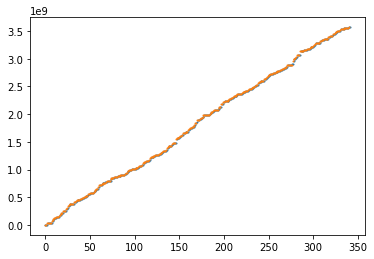

In [44]:
plt.scatter(np.arange(len(ts_8_uint64[859:])), ts_8_uint64[859:], s=1)
plt.scatter(np.arange(len(ts_9_uint64[860:])), ts_9_uint64[860:], s=1)

In [45]:
ts_8_uint64[:438]-ts_9_uint64[:438]

array([ 1507685,  1507685,  1507685,  1507686,  1507686,  1507685,
        1507685,  1507685,  1507686,  1507685,  1507685,  1507685,
        1507685,  1507685,  1507686,  3145138,  8872247,  8770025,
        5190049, 14235899,  8916031,  2869359,  5626997,  4608259,
        6132930,  7764827,  3950823,  4712034,  7957497, 14934180,
       16539011,  9596222,  9414238,  6067258,  5758623,  5894920,
       10792006, 12718089,  4347384, 11417869,  9595187,  2950223,
       15635075, 24410643, 52607242,  4166392,  2579714,  9249400,
       13647623, 13983511,  4434002, 14782057, 13879827,  1803350,
        1727259, 16971954,  2865754,  8246437,  2680216,  8691322,
       27293995,  2039289,  1781055, 22211798,  9613264,  6634980,
        4111072, 11953345,  6970408, 35076854, 18677306,  6289216,
        1507685,  1507685,  1507685,  1507685,  1507685,  1507685,
        1507685,  1507686,  1507685,  1507685,  1507685,  1507685,
        1507685,  1507685,  1507686,  1507686,  1507685,  1507

In [46]:
ts_9_uint64[860:]

array([   1577398,    2604899,   37162188,   38490454,   40590598,
         40810983,   43010673,   74995233,   82065318,  101422673,
        118549364,  123496068,  141295225,  149134069,  151755571,
        169998175,  173787671,  195959493,  208121238,  217392261,
        243723584,  247704588,  250028433,  279759893,  300762722,
        335275593,  361913506,  371563952,  376054530,  378212331,
        379852883,  385570828,  406659051,  407402151,  428390942,
        444236239,  446973687,  450695129,  458324961,  469493825,
        476562031,  483272450,  492074019,  499079161,  501356715,
        519800617,  523047839,  531123602,  555128130,  564496541,
        569742031,  571453525,  583287738,  586206140,  603938097,
        613103016,  636513230,  652441709,  657123417,  677594252,
        714991591,  722923936,  725223428,  747857150,  748805708,
        750090293,  765609495,  765950633,  773681209,  787012065,
        787806281,  791717478,  796836301,  832461779,  839279

In [47]:
ts_8_uint64[860:]-ts_9_uint64[860:]

array([1507686, 1507685, 1507686, 1507686, 1507685, 1507685, 1507686,
       1507685, 1507686, 1507686, 1507685, 1507686, 1507685, 1507685,
       1507685, 1507685, 1507685, 1507685, 1507685, 1507686, 1507685,
       1507685, 1507685, 1507685, 1507685, 1507686, 1507686, 1507685,
       1507685, 1507685, 1507685, 1507685, 1507685, 1507685, 1507685,
       1507686, 1507686, 1507686, 1507686, 1507685, 1507685, 1507685,
       1507685, 1507685, 1507685, 1507685, 1507685, 1507685, 1507685,
       1507686, 1507685, 1507685, 1507685, 1507685, 1507685, 1507686,
       1507685, 1507685, 1507686, 1507685, 1507685, 1507685, 1507686,
       1507686, 1507685, 1507685, 1507685, 1507685, 1507685, 1507685,
       1507686, 1507685, 1507686, 1507685, 1507685, 1507685, 1507685,
       1507685, 1507685, 1507685, 1507686, 1507686, 1507686, 1507685,
       1507686, 1507685, 1507685, 1507685, 1507685, 1507685, 1507685,
       1507685, 1507685, 1507686, 1507685, 1507685, 1507685, 1507685,
       1507685, 1507

In [48]:
ts_8_uint64[860:]-1507686

array([   1577398,    2604898,   37162188,   38490454,   40590597,
         40810982,   43010673,   74995232,   82065318,  101422673,
        118549363,  123496068,  141295224,  149134068,  151755570,
        169998174,  173787670,  195959492,  208121237,  217392261,
        243723583,  247704587,  250028432,  279759892,  300762721,
        335275593,  361913506,  371563951,  376054529,  378212330,
        379852882,  385570827,  406659050,  407402150,  428390941,
        444236239,  446973687,  450695129,  458324961,  469493824,
        476562030,  483272449,  492074018,  499079160,  501356714,
        519800616,  523047838,  531123601,  555128129,  564496541,
        569742030,  571453524,  583287737,  586206139,  603938096,
        613103016,  636513229,  652441708,  657123417,  677594251,
        714991590,  722923935,  725223428,  747857150,  748805707,
        750090292,  765609494,  765950632,  773681208,  787012064,
        787806281,  791717477,  796836301,  832461778,  839279

In [49]:
ts_9_uint64[860:]

array([   1577398,    2604899,   37162188,   38490454,   40590598,
         40810983,   43010673,   74995233,   82065318,  101422673,
        118549364,  123496068,  141295225,  149134069,  151755571,
        169998175,  173787671,  195959493,  208121238,  217392261,
        243723584,  247704588,  250028433,  279759893,  300762722,
        335275593,  361913506,  371563952,  376054530,  378212331,
        379852883,  385570828,  406659051,  407402151,  428390942,
        444236239,  446973687,  450695129,  458324961,  469493825,
        476562031,  483272450,  492074019,  499079161,  501356715,
        519800617,  523047839,  531123602,  555128130,  564496541,
        569742031,  571453525,  583287738,  586206140,  603938097,
        613103016,  636513230,  652441709,  657123417,  677594252,
        714991591,  722923936,  725223428,  747857150,  748805708,
        750090293,  765609495,  765950633,  773681209,  787012065,
        787806281,  791717478,  796836301,  832461779,  839279

In [50]:
ts_8_uint64.shape

(1201,)

In [51]:
ts_9_uint64.shape

(1201,)

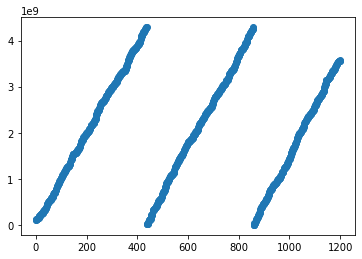

In [52]:
plt.scatter(np.arange(1201), ts_8_uint64)

In [53]:
for board in marocdata.active_boards:
    ts = np.asarray([event.TS for i, event in marocdata.get_board(board).events.items()])
    evts = np.asarray([event.evt_id for i, event in marocdata.get_board(board).events.items()])
    overflow = overflow_idx(ts)
    print(board, overflow_idx(ts), ts-ts[0])
    

1 [438, 860, 1202] [         0     982926    8818334 ... 3460448943 3467256716 3471731372]
2 [437, 859, 1201] [         0    7835408   22109164 ... 3459466017 3466273790 3470748446]
3 [438, 860, 1202] [         0    7835408   22109164 ... 3459466017 3466273790 3470748446]
4 [439, 860, 1202] [         0    7835408   22109164 ... 3459466017 3466273790 3470748446]
5 [439, 860, 1202] [         0    7835408   22109164 ... 3459466018 3466273790 3470748447]
6 [439, 860, 1202] [         0    7835408   22109164 ... 3459466017 3466273790 3470748447]
7 [439, 860, 1202] [         0    7835408   22109164 ... 3459466018 3466273790 3470748447]
8 [438, 859, 1201] [         0    7835408   22109164 ... 3459466017 3466273790 3470748447]
9 [438, 860, 1201] [         0    7835408   22109164 ... 3459466017 3466273790 3470748446]
10 [439, 862, 1203] [         0    7835407   22109164 ... 3466273790 3470748446 3481184193]
11 [439, 863, 1203] [         0    7835408   22109164 ... 3466273790 3470748447 348118419

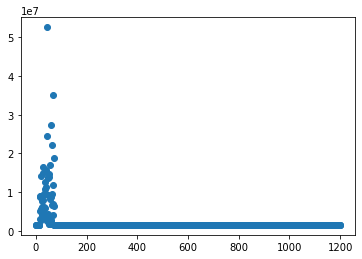

In [54]:
plt.scatter(np.arange(1201), ts_8-ts_9)

In [55]:
ts_8[:438]-ts_9[:438]

array([ 1507685,  1507685,  1507685,  1507686,  1507686,  1507685,
        1507685,  1507685,  1507686,  1507685,  1507685,  1507685,
        1507685,  1507685,  1507686,  3145138,  8872247,  8770025,
        5190049, 14235899,  8916031,  2869359,  5626997,  4608259,
        6132930,  7764827,  3950823,  4712034,  7957497, 14934180,
       16539011,  9596222,  9414238,  6067258,  5758623,  5894920,
       10792006, 12718089,  4347384, 11417869,  9595187,  2950223,
       15635075, 24410643, 52607242,  4166392,  2579714,  9249400,
       13647623, 13983511,  4434002, 14782057, 13879827,  1803350,
        1727259, 16971954,  2865754,  8246437,  2680216,  8691322,
       27293995,  2039289,  1781055, 22211798,  9613264,  6634980,
        4111072, 11953345,  6970408, 35076854, 18677306,  6289216,
        1507685,  1507685,  1507685,  1507685,  1507685,  1507685,
        1507685,  1507686,  1507685,  1507685,  1507685,  1507685,
        1507685,  1507685,  1507686,  1507686,  1507685,  1507

In [56]:
evts_8 = np.asarray([event.evt_id for i, event in marocdata.get_board(8).events.items()])
evts_9 = np.asarray([event.evt_id for i, event in marocdata.get_board(9).events.items()])

In [57]:
evts_8[40:50], evts_9[40:50]

(array([54, 55, 56, 57, 58, 59, 60, 61, 62, 63], dtype=uint32),
 array([53, 54, 55, 56, 57, 58, 59, 60, 61, 62], dtype=uint32))

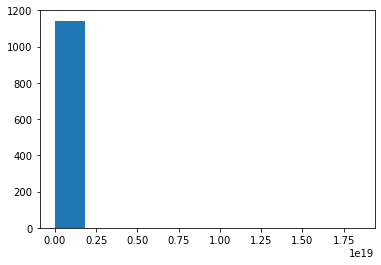

In [58]:
plt.hist(ts_8_uint64[np.argwhere(evts_8==evts_9)]-ts_9_uint64[np.argwhere(evts_8==evts_9)], bins=10)
plt.show()

In [59]:
for i, val in enumerate(ts_8_uint64[np.argwhere(evts_8-evts_8[0]==evts_9-evts_9[0])]-ts_9_uint64[np.argwhere(evts_8-evts_8[0]==evts_9-evts_9[0])]):
    print(i, val, (evts_8-evts_8[0])[np.argwhere(evts_8-evts_8[0]==evts_9-evts_9[0])][i])

0 [1507685] [0]
1 [1507685] [1]
2 [1507685] [2]
3 [1507686] [3]
4 [1507686] [4]
5 [1507685] [5]
6 [1507685] [6]
7 [1507685] [7]
8 [1507686] [8]
9 [1507685] [9]
10 [1507685] [10]
11 [1507685] [11]
12 [1507685] [12]
13 [1507685] [13]
14 [1507686] [14]
15 [1507685] [73]
16 [1507685] [74]
17 [1507685] [75]
18 [1507685] [76]
19 [1507685] [77]
20 [1507685] [78]
21 [1507685] [79]
22 [1507686] [80]
23 [1507685] [81]
24 [1507685] [82]
25 [1507685] [83]
26 [1507685] [84]
27 [1507685] [85]
28 [1507685] [86]
29 [1507686] [87]
30 [1507686] [88]
31 [1507685] [89]
32 [1507685] [90]
33 [1507685] [91]
34 [1507686] [92]
35 [1507685] [93]
36 [1507685] [94]
37 [1507685] [95]
38 [1507685] [96]
39 [1507685] [97]
40 [1507686] [98]
41 [1507685] [99]
42 [1507685] [100]
43 [1507685] [101]
44 [1507685] [102]
45 [1507685] [103]
46 [1507686] [104]
47 [1507685] [105]
48 [1507685] [106]
49 [1507685] [107]
50 [1507686] [108]
51 [1507685] [109]
52 [1507686] [110]
53 [1507685] [111]
54 [1507686] [112]
55 [1507685] [113

717 [1507685] [775]
718 [1507685] [776]
719 [1507685] [777]
720 [1507685] [778]
721 [1507685] [779]
722 [1507685] [780]
723 [1507685] [781]
724 [1507685] [782]
725 [1507685] [783]
726 [1507685] [784]
727 [1507685] [785]
728 [1507685] [786]
729 [1507685] [787]
730 [1507686] [788]
731 [1507685] [789]
732 [1507685] [790]
733 [1507686] [791]
734 [1507686] [792]
735 [1507685] [793]
736 [1507685] [794]
737 [1507685] [795]
738 [1507686] [796]
739 [1507685] [797]
740 [1507685] [798]
741 [1507685] [799]
742 [1507685] [800]
743 [1507686] [801]
744 [1507685] [802]
745 [1507685] [803]
746 [1507685] [804]
747 [1507685] [805]
748 [1507686] [806]
749 [1507685] [807]
750 [1507685] [808]
751 [1507685] [809]
752 [1507685] [810]
753 [1507686] [811]
754 [1507685] [812]
755 [1507685] [813]
756 [1507686] [814]
757 [1507686] [815]
758 [1507686] [816]
759 [1507685] [817]
760 [1507685] [818]
761 [1507685] [819]
762 [1507685] [820]
763 [1507686] [821]
764 [1507686] [822]
765 [1507686] [823]
766 [1507685] [824]


In [60]:
evts_8-evts_8[0]

array([   0,    1,    2, ..., 1199, 1200, 1201], dtype=uint32)

In [61]:
evts_9-evts_9[0]

array([   0,    1,    2, ..., 1199, 1200, 1201], dtype=uint32)

In [62]:
delta = (ts_8-ts_8[0])[np.argwhere(evts_8-evts_8[0]==evts_9-evts_9[0])]-(ts_9-ts_9[0])[np.argwhere(evts_8-evts_8[0]==evts_9-evts_9[0])]

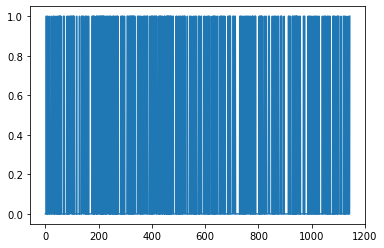

In [63]:
plt.plot(np.arange(1144), delta)
plt.show()